<a href="https://colab.research.google.com/github/sun55jy/GIT/blob/main/Diabetes_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import shap
import joblib


In [3]:
# Load directly from Kaggle’s public URL
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)

print("Shape:", df.shape)
df.head()


Shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Load directly from Kaggle’s public URL
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)

print("Shape:", df.shape)
df.head()


Shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

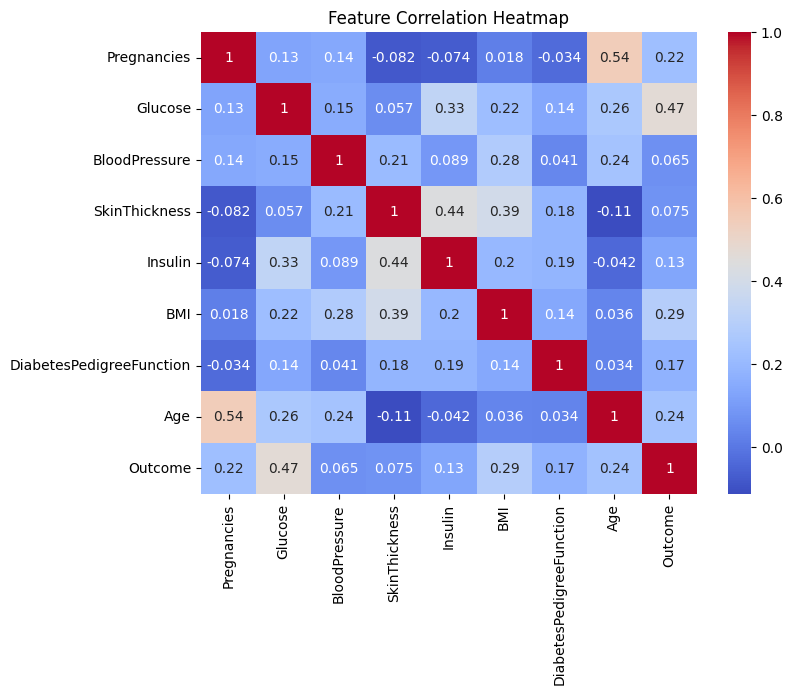

In [5]:
# Check missing values and basic info
print(df.info())
print(df.describe())

# Plot correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [6]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zero:
    df[col] = df[col].replace(0, np.nan)
    df[col].fillna(df[col].median(), inplace=True)


/tmp/ipython-input-472203526.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [7]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)


(614, 8) (154, 8)


In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb.fit(X_train_scaled, y_train)

rf_pred = rf.predict(X_test_scaled)
xgb_pred = xgb.predict(X_test_scaled)


Random Forest Accuracy: 0.7337662337662337
XGBoost Accuracy: 0.7142857142857143


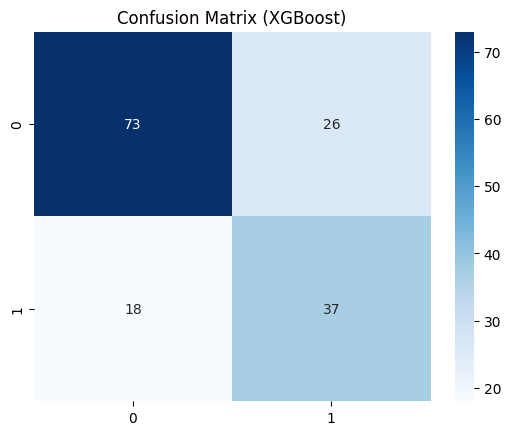

              precision    recall  f1-score   support

           0       0.80      0.74      0.77        99
           1       0.59      0.67      0.63        55

    accuracy                           0.71       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.73      0.71      0.72       154



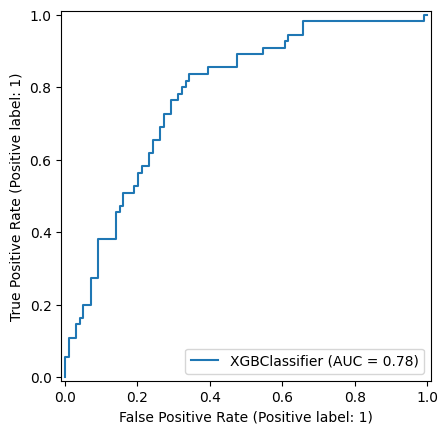

In [10]:
from sklearn.metrics import accuracy_score

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, xgb_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (XGBoost)")
plt.show()

# Classification report
print(classification_report(y_test, xgb_pred))

# ROC Curve
RocCurveDisplay.from_estimator(xgb, X_test_scaled, y_test)
plt.show()


In [ ]:
explainer = shap.Explainer(xgb)
shap_values = explainer(X_test_scaled)

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [13]:
# Example patient data (replace with user input later)
new_data = {
    'Pregnancies': 2,
    'Glucose': 145,
    'BloodPressure': 80,
    'SkinThickness': 25,
    'Insulin': 100,
    'BMI': 28.4,
    'DiabetesPedigreeFunction': 0.35,
    'Age': 35
}

patient = pd.DataFrame([new_data])
patient_scaled = scaler.transform(patient)
prob = xgb.predict_proba(patient_scaled)[0][1]

print(f"Predicted Diabetes Risk: {prob*100:.2f}%")


Predicted Diabetes Risk: 84.63%


In [14]:
joblib.dump(xgb, "diabetes_model.joblib")
joblib.dump(scaler, "scaler.joblib")
print("✅ Model and scaler saved successfully!")


✅ Model and scaler saved successfully!
